In [4]:
import pandas as pd
data_path = '../data/skylab_instagram_datathon_dataset.csv'

data = pd.read_csv(data_path, delimiter=';')  # Specify the delimiter (e.g., comma)

data["period_end_date"] = pd.to_datetime(data["period_end_date"])



In [5]:
important_cols = ["followers","pictures","videos","comments","likes"]
funnylist = []

for group_idx in data["compset_group"].unique():
    filtered_df = data[data["compset_group"] == group_idx]
    filtered_sum = filtered_df.isna().sum()
    funnylist.append((group_idx,
                      sum(filtered_sum[important_cols])/len(filtered_df)))

funnydict = {idx:cumulative for idx,cumulative in funnylist}

/tmp/ipykernel_11564/801275180.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
/tmp/ipykernel_11564/801275180.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
/tmp/ipykernel_11564/801275180.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

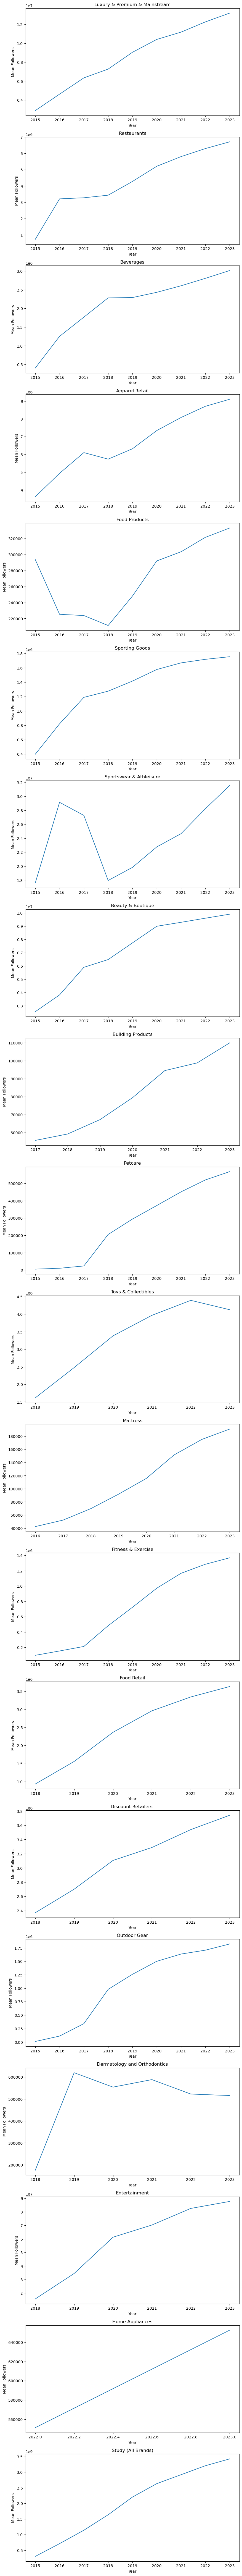

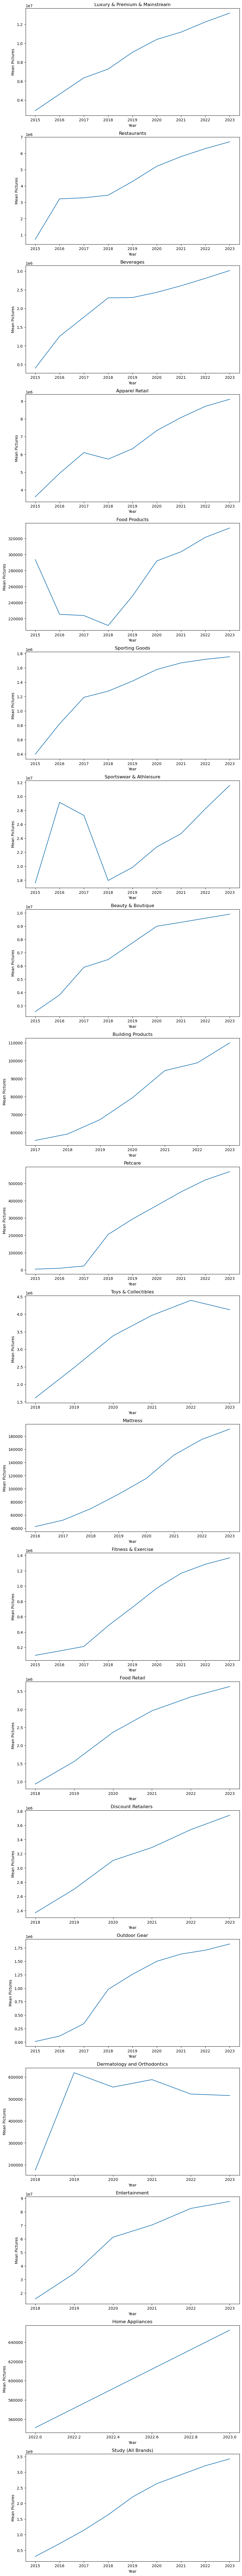

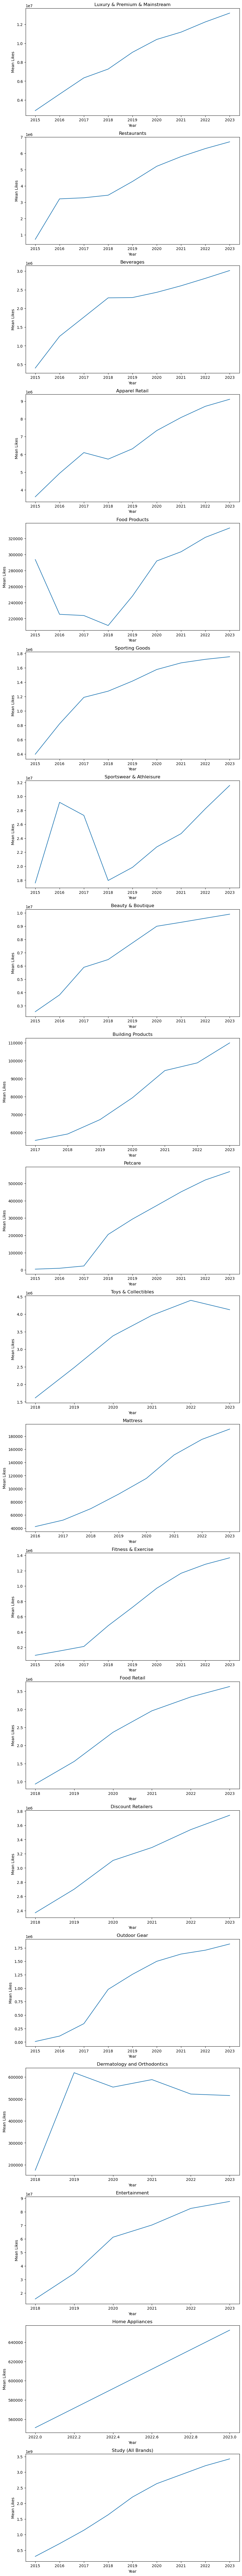

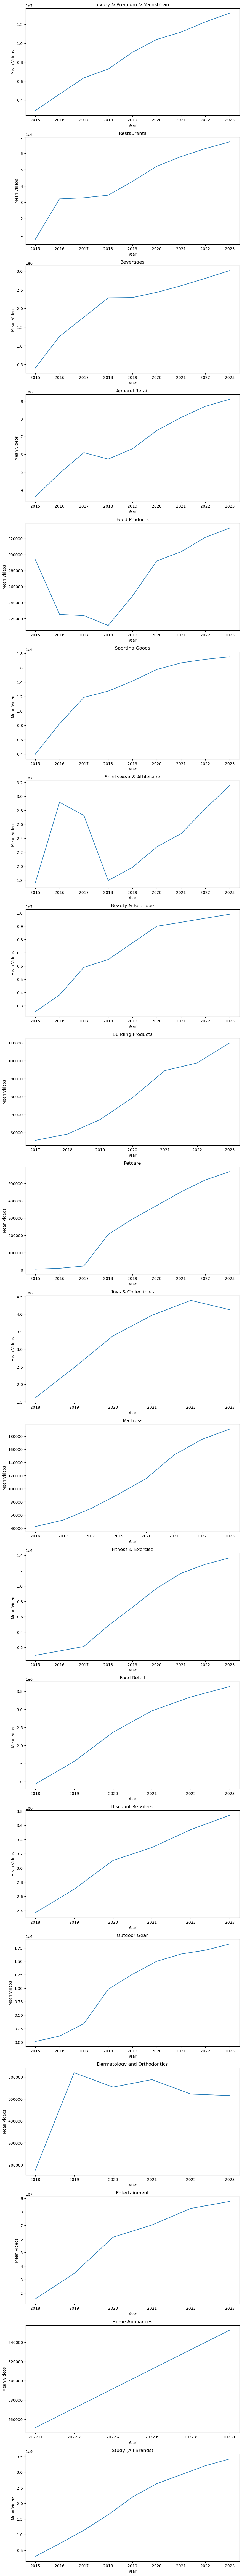

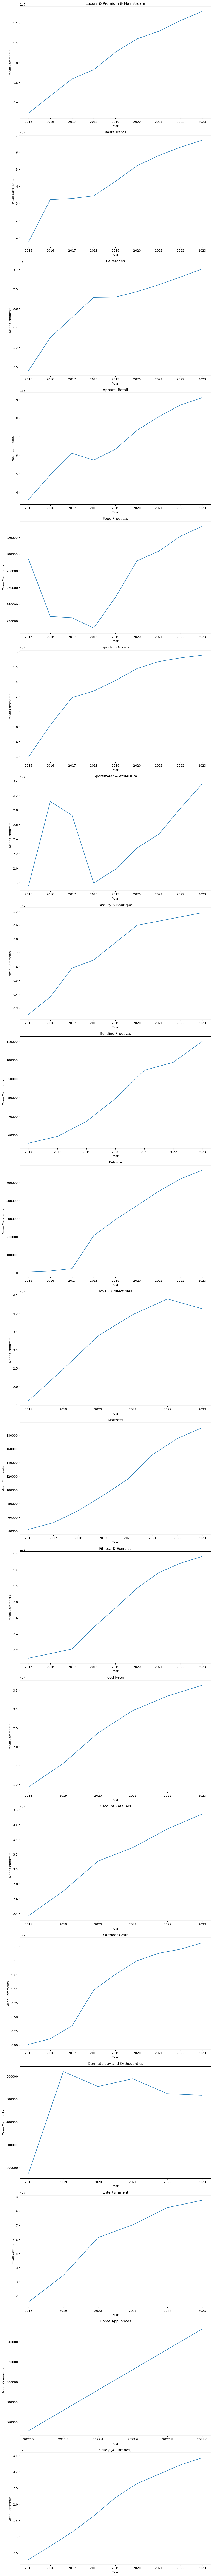

In [9]:
import matplotlib.pyplot as plt

def calculate_yearly_means(df, col, category_column, category_value, period: str="yearly"):
    filtered_df = df[df[category_column] == category_value]
    
    # Convert the index to datetime if it's not already
    if period == "yearly":
        filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.year
    elif period == "montly":
        filtered_df["time"] = pd.to_datetime(filtered_df["period_end_date"]).dt.month

    yearly_means = filtered_df[col].groupby(filtered_df["time"]).mean()
    
    return yearly_means


metrics = ["followers", "pictures", "likes", "videos", "comments"]

for col in metrics:
    compset_groups = data["compset_group"].unique()
    num_columns = len(compset_groups)
    fig, axes = plt.subplots(num_columns, 1, figsize=(10, 6*num_columns))
    plt.title(col)
    for i, cat in enumerate(compset_groups):
        cat_means = calculate_yearly_means(df=data, col="followers", category_column="compset", category_value=cat)
        cat_means.plot(ax=axes[i], title=cat)
        axes[i].set_ylabel('Mean' + ' ' + col.capitalize())
        axes[i].set_xlabel('Year')

plt.tight_layout()
plt.show()